ePix100/ePix10K geometry
-------------------------------

ePix100 detectors have one module of 704 × 768 pixels. Module built from 4 ASICs with 352 rows and 384 columns of pixels. Normal pixels are 50 × 50 um. The pixels on the inner edges of ASICs are bigger.

ePix10K detectors have one module of 352 × 384 pixels. Module built from 4 ASICs with 176 rows and 192 columns of pixels. Normal pixels are 100 × 100 um. The pixels on the inner edges of ASICs are bigger.

Layouts implemented in classes `Epix100Geometry` and `Epix10KGeometry` with the identical interface.

There are 4 more rows in raw data. These are calibration pixels. They have the same electronics as normal pixels but aren't wired to the sensor. They are two first and two last rows in the raw data array. Classes `Epix100Geometry` and `Epix10KGeometry` assume that calibration rows are cut.

In [1]:
%matplotlib inline
from extra_geom import Epix100Geometry

Idealized ePix100 geometry layout may be created without any parameters. You may specify the origin. By default, the origin is at the detector center.

<AxesSubplot:title={'center':'ePix100 detector geometry (No file)'}, xlabel='pixels', ylabel='pixels'>

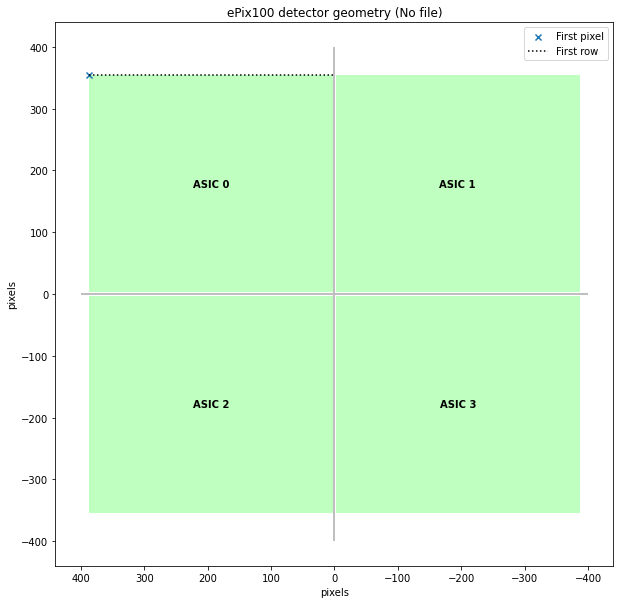

In [2]:
geom = Epix100Geometry.from_origin([0, 0])
geom.inspect()

We can also load ePix100 geometry from a [CrystFEL format geometry file](https://www.desy.de/~twhite/crystfel/manual-crystfel_geometry.html). These are text based files, often saved with a .geom extension.

In [3]:
# Create a CrystFEL format geometry file to demonstrate loading it
geom.write_crystfel_geom('epix100_example.geom', adu_per_ev=1, clen=1)

<AxesSubplot:title={'center':'ePix100 detector geometry (epix100_example.geom)'}, xlabel='pixels', ylabel='pixels'>

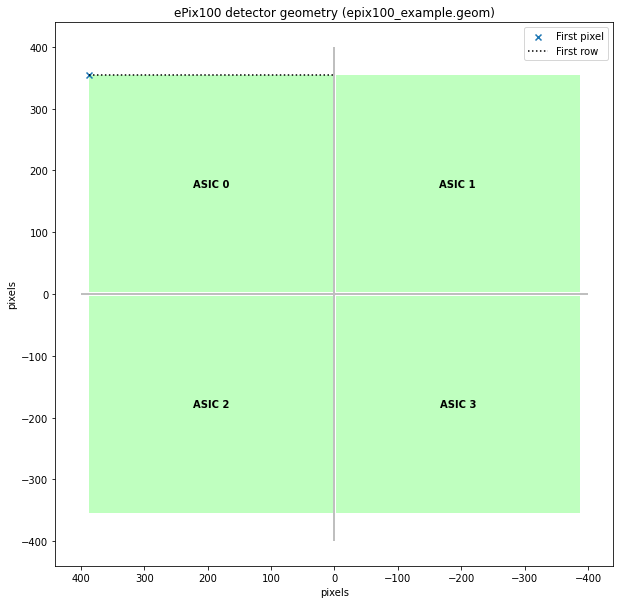

In [4]:
# Load geometry from CrystFEL format file
geom2 = Epix100Geometry.from_crystfel_geom('epix100_example.geom')
geom2.inspect()

We can get physical coordinates of pixels and plot diffraction image according to the detector geometry

<AxesSubplot:xlabel='pixels', ylabel='pixels'>

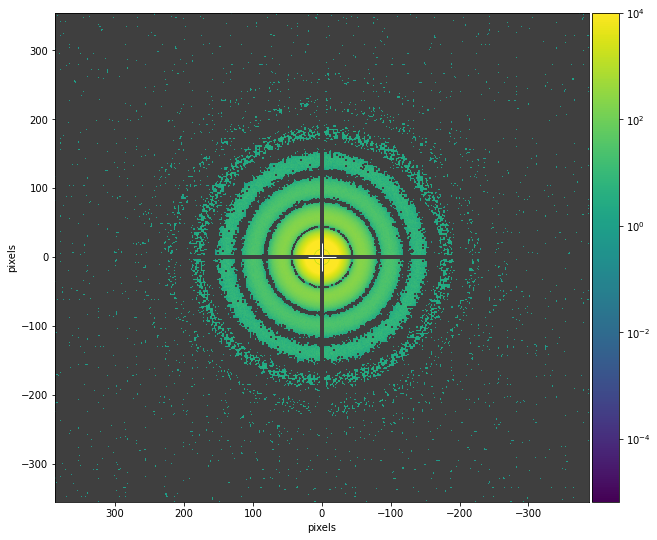

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

R0 = 5e2
r = np.linalg.norm(geom.get_pixel_positions(), axis=3)
q = np.pi * r * R0
f = (np.sin(q) * q - np.cos(q)) / (q*q*q)
a = np.random.poisson(f*f*1e5)+np.random.randn(*r.shape)

fig, ax = plt.subplots(figsize=(12,9))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

geom.plot_data(a, norm=LogNorm(vmax=1e4), ax=ax, colorbar={'cax': cax})

The code above creates a geometry object for ePix100. See these examples for how to use a geometry object:

- [Assemble images](apply_geometry.ipynb)
- [Convert positions in the data array into physical positions](convert_coords.ipynb)
- [Create masks](masks.ipynb)